In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [75]:
from sklearn.preprocessing import StandardScaler

In [106]:
train_data = pd.read_csv('./Dataset/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From above information we can see that Age, Cabin, and Embarked has Null values

**Handilng Null Values**

In [74]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Cabin'] = train_data['Cabin'].fillna('u')

In [110]:
train_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [77]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

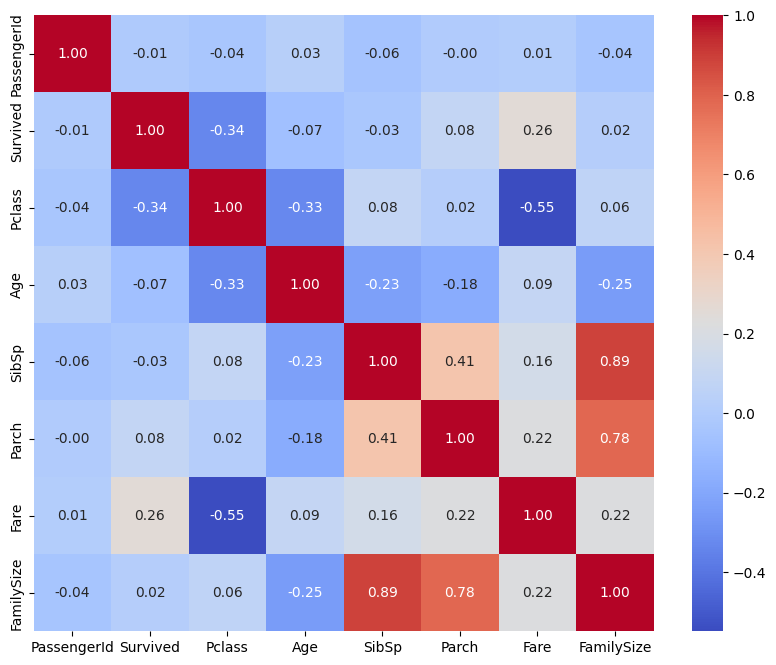

In [81]:
numerical_data = train_data.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [82]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1


In [83]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,u,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,u,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,u,S,1


<Axes: xlabel='Age', ylabel='Count'>

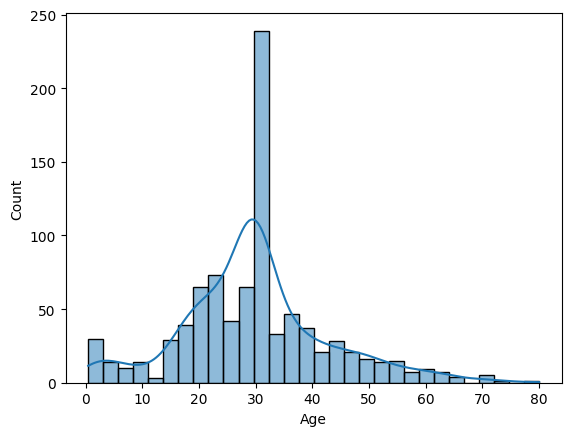

In [84]:
sns.histplot(data=train_data, x='Age', bins=30, kde=True)

<Axes: xlabel='Embarked', ylabel='count'>

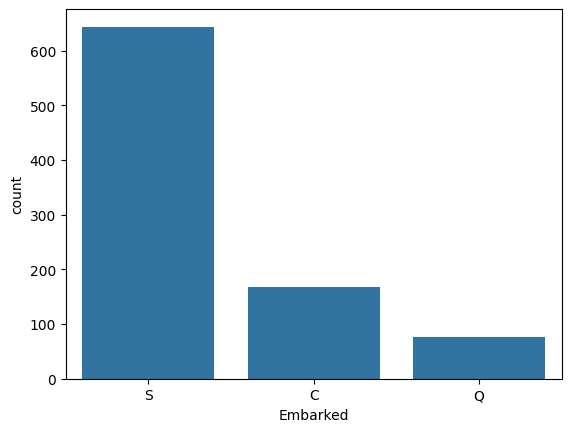

In [85]:
sns.countplot(data=train_data, x= 'Embarked')

In [86]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681,1.906637
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504,1.614703
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [87]:
train_data['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

# Bivariate Analysis

In [88]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   889 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.2+ KB


<Axes: xlabel='Age', ylabel='Survived'>

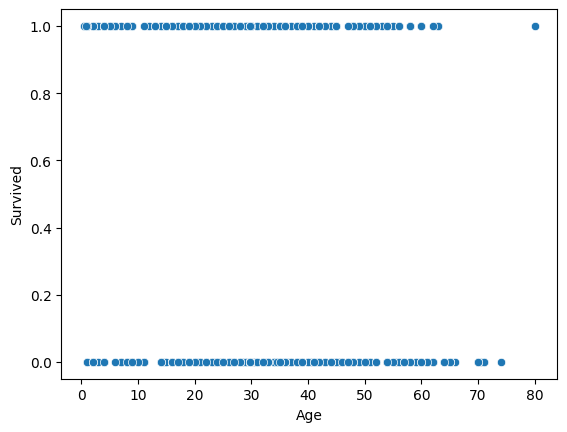

In [89]:
sns.scatterplot(data=train_data, x='Age', y='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

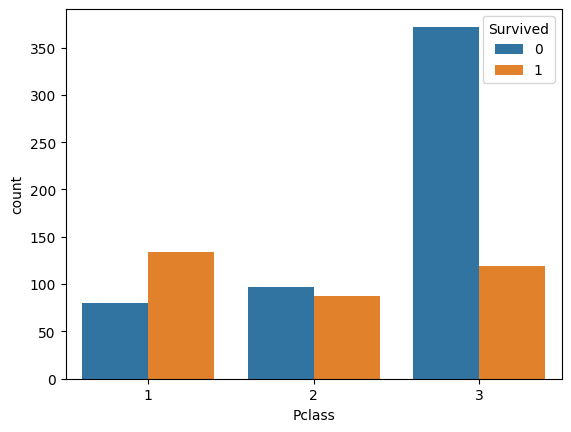

In [90]:
sns.countplot(data=train_data, x='Pclass', hue='Survived')

As we can see that P class 1 and 2 percentage then 3.

<Axes: xlabel='Sex', ylabel='count'>

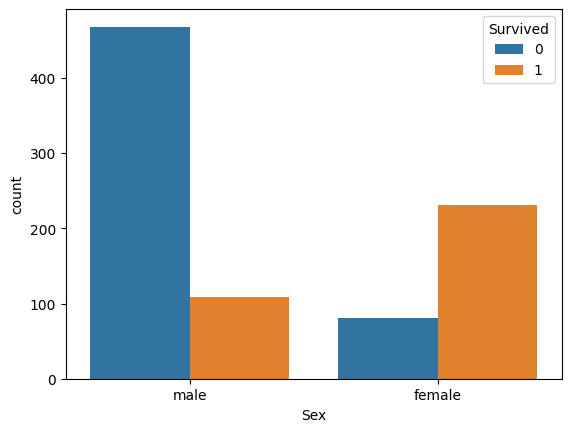

In [91]:
sns.countplot(data=train_data, x='Sex', hue='Survived')

<Axes: xlabel='SibSp', ylabel='count'>

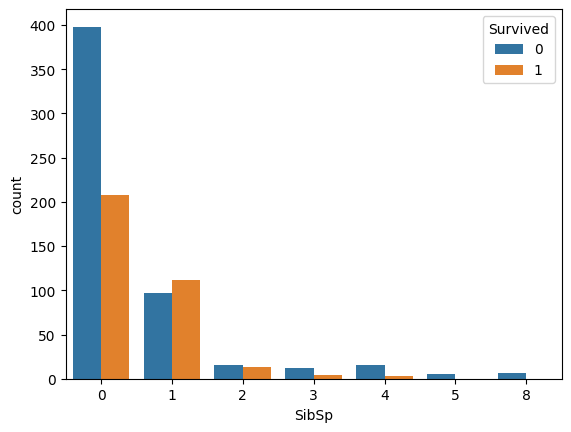

In [92]:
sns.countplot(data=train_data, x='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

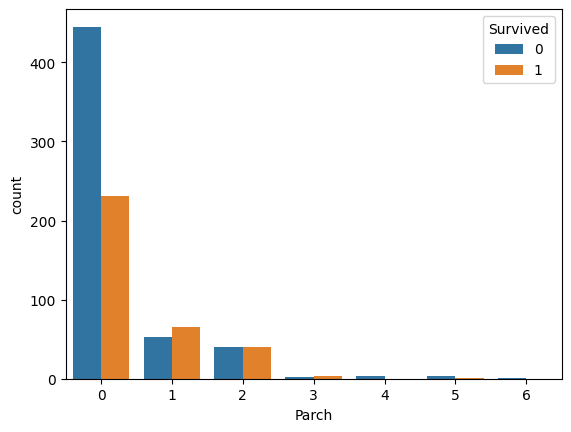

In [93]:
sns.countplot(data=train_data, x='Parch', hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

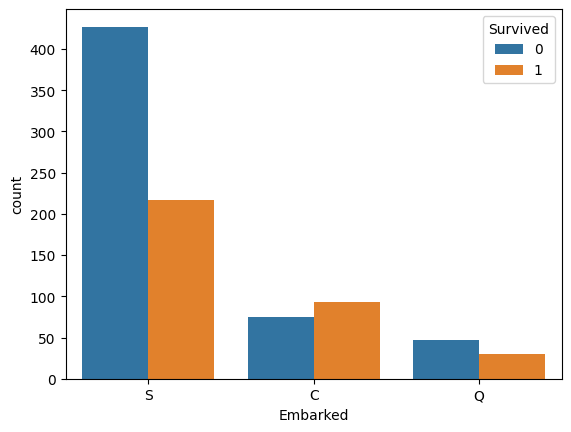

In [94]:
sns.countplot(data=train_data, x='Embarked', hue='Survived')

In [97]:
from sklearn.model_selection import train_test_split



In [98]:

X = pd.get_dummies(train_data.drop(columns=['PassengerId', 'Name', 'Ticket']), drop_first=True)
y = train_data['Survived']


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [102]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
dt_clf = DecisionTreeClassifier(max_depth=6, random_state=42)


In [103]:
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Logistic Regression Cross-Validation Accuracy:", scores.mean())
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Cross-Validation Accuracy: 1.0
Logistic Regression Accuracy: 1.0

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [70]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [71]:
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 1.0

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

